In [ ]:
!pip install pycaret

In [3]:
# Import dependencies
import pandas as pd
import numpy as np
from pycaret.classification import *

## Section I: Summary of Data Treatment

In [5]:
from google.colab import drive
drive.mount('/content/drive')

# Load the file from Google Drive
dataframe_path = '/content/drive/MyDrive/Bootcamp/substance-use-mental-illness-analysis/data/subset_three_targets.csv'
df = pd.read_csv(dataframe_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
# Create ADULT dataframe (CATAG3 == 2, 3, or 4)
ADULT = df[df['CATAG3'].isin([2,3,4])]

# Drop the YODSMMDE and DEP columns from ADULT dataframe
ADULT = ADULT.drop(['YODSMMDE', 'DEP'], axis=1)

# Create YOUTH dataframe (CATAG3 == 1)
YOUTH = df[df['CATAG3'].isin([1])]

# Drop the ADSMMDEA and DEP columns from YOUTH dataframe
YOUTH = YOUTH.drop(['ADSMMDEA', 'DEP'], axis=1)

In [7]:
# Import pycaret classification and init setup, correcting the class imbalance with fix imbalance
s = setup(ADULT, target = 'ADSMMDEA', session_id = 123, fix_imbalance = True)

,Description,Value
0,Session id,123
1,Target,ADSMMDEA
2,Target type,Binary
3,Original data shape,"(33177, 16)"
4,Transformed data shape,"(33177, 16)"
5,Transformed train set shape,"(23223, 16)"
6,Transformed test set shape,"(9954, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [ ]:
# NOte: set fix imbalance to correct for class imbalance

In [8]:
# import ClassificationExperiment and init the class
from pycaret.classification import ClassificationExperiment
exp = ClassificationExperiment()

In [ ]:
# Ensembled sampling
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier
from imblearn.ensemble import RUSBoostClassifier
from imblearn.ensemble import EasyEnsembleClassifier
from imblearn.ensemble import BalancedBaggingClassifier

In [ ]:
brf = BalancedRandomForestClassifier(random_state=42)
ruboost = RUSBoostClassifier(random_state=42)
easyens = EasyEnsembleClassifier(random_state=42)
bbag = BalancedBaggingClassifier(random_state=42)

In [9]:
# check the type of exp
type(exp)

pycaret.classification.oop.ClassificationExperiment

In [10]:
# init setup on exp setting
exp.setup(ADULT, target = 'ADSMMDEA', session_id = 123)

,Description,Value
0,Session id,123
1,Target,ADSMMDEA
2,Target type,Binary
3,Original data shape,"(33177, 16)"
4,Transformed data shape,"(33177, 16)"
5,Transformed train set shape,"(23223, 16)"
6,Transformed test set shape,"(9954, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [11]:
# Compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7820,0.6947,0.0886,0.5592,0.1528,0.0979,0.1545,2.4560
ada,Ada Boost Classifier,0.7816,0.6913,0.0902,0.5475,0.1546,0.0984,0.1525,0.8990
lr,Logistic Regression,0.7815,0.6911,0.0863,0.5476,0.1489,0.0945,0.1492,1.2750
ridge,Ridge Classifier,0.7806,0.0000,0.0508,0.5637,0.0931,0.0586,0.1172,0.1280
lda,Linear Discriminant Analysis,0.7806,0.6913,0.1113,0.5263,0.1835,0.1152,0.1624,0.3340
lightgbm,Light Gradient Boosting Machine,0.7792,0.6880,0.1108,0.5132,0.1821,0.1121,0.1570,1.2980
dummy,Dummy Classifier,0.7780,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1340
xgboost,Extreme Gradient Boosting,0.7725,0.6715,0.1369,0.4580,0.2107,0.1210,0.1514,3.0490
rf,Random Forest Classifier,0.7614,0.6417,0.1757,0.4120,0.2463,0.1310,0.1478,1.9430
et,Extra Trees Classifier,0.7597,0.6221,0.1738,0.4039,0.2429,0.1264,0.1423,2.4920


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [12]:
# Compare models using OOP
exp.compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7820,0.6947,0.0886,0.5592,0.1528,0.0979,0.1545,0.1800
ada,Ada Boost Classifier,0.7816,0.6913,0.0902,0.5475,0.1546,0.0984,0.1525,0.1980
lr,Logistic Regression,0.7815,0.6911,0.0863,0.5476,0.1489,0.0945,0.1492,0.7800
ridge,Ridge Classifier,0.7806,0.0000,0.0508,0.5637,0.0931,0.0586,0.1172,0.1560
lda,Linear Discriminant Analysis,0.7806,0.6913,0.1113,0.5263,0.1835,0.1152,0.1624,0.1600
lightgbm,Light Gradient Boosting Machine,0.7792,0.6880,0.1108,0.5132,0.1821,0.1121,0.1570,0.2710
dummy,Dummy Classifier,0.7780,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1590
xgboost,Extreme Gradient Boosting,0.7725,0.6715,0.1369,0.4580,0.2107,0.1210,0.1514,0.1460
rf,Random Forest Classifier,0.7614,0.6417,0.1757,0.4120,0.2463,0.1310,0.1478,0.4310
et,Extra Trees Classifier,0.7597,0.6221,0.1738,0.4039,0.2429,0.1264,0.1423,0.7390


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

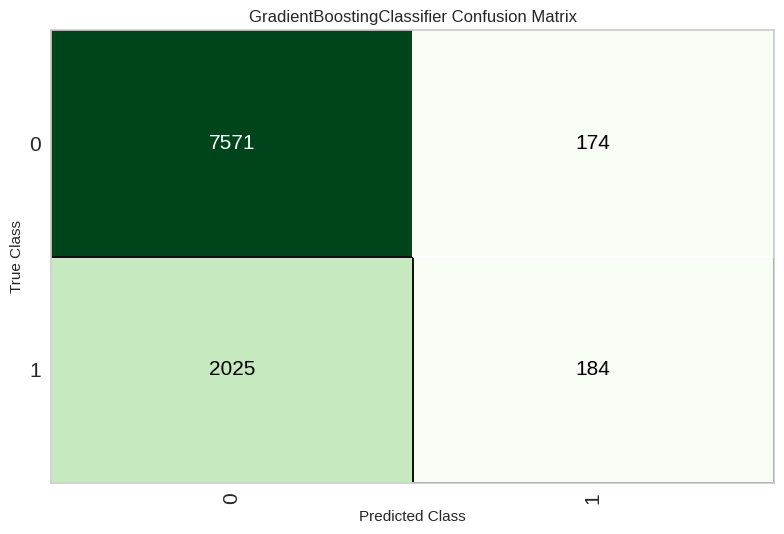

In [13]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

In [ ]:
# Save the best model (Gradient Boosting Classifier) to disk

# Import pickle
import pickle

# Save the model to disk
filename = 'finalized_model.sav'
pickle.dump(gbc, open(filename, 'wb'))

In [ ]:
# Optimize the threshold

# It's gonna output a probability, setting threshold to 50%

# You can "slide" it left or right

# If you lower the threshold, it increases recall

# If you raise the threshold, it increases precision


# SHAP summary - best feature importance methodology to reference

# Gives true marginal contribution of each feature

# Run SHAP for correlation values between prediction values

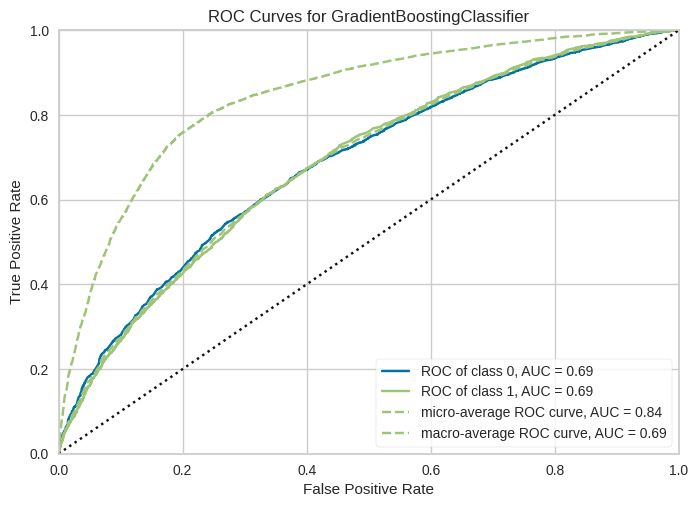

In [14]:
# plot AUC
plot_model(best, plot = 'auc')

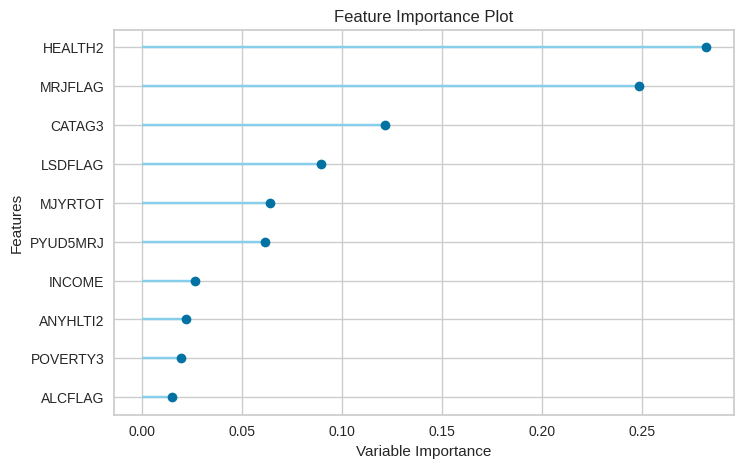

In [15]:
# plot feature importance
plot_model(best, plot = 'feature')

In [17]:
### Section II: YOUTH

In [18]:
# import pycaret classification and init setup
s = setup(YOUTH, target = 'YODSMMDE', session_id = 123)

,Description,Value
0,Session id,123
1,Target,YODSMMDE
2,Target type,Binary
3,Original data shape,"(10241, 16)"
4,Transformed data shape,"(10241, 16)"
5,Transformed train set shape,"(7168, 16)"
6,Transformed test set shape,"(3073, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [19]:
# Instatiate an experiment
exp = ClassificationExperiment()

In [21]:
# init setup on exp
exp.setup(YOUTH, target = 'YODSMMDE', session_id = 123)

,Description,Value
0,Session id,123
1,Target,YODSMMDE
2,Target type,Binary
3,Original data shape,"(10241, 16)"
4,Transformed data shape,"(10241, 16)"
5,Transformed train set shape,"(7168, 16)"
6,Transformed test set shape,"(3073, 16)"
7,Numeric features,15
8,Preprocess,True
9,Imputation type,simple


In [22]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7631,0.6859,0.1609,0.6012,0.2530,0.1645,0.2160,0.6320
lr,Logistic Regression,0.7612,0.6867,0.1508,0.5931,0.2392,0.1529,0.2045,2.1720
ridge,Ridge Classifier,0.7612,0.0000,0.1430,0.5979,0.2297,0.1470,0.2009,0.1190
lda,Linear Discriminant Analysis,0.7593,0.6868,0.1782,0.5621,0.2688,0.1691,0.2099,0.1010
ada,Ada Boost Classifier,0.7589,0.6850,0.1441,0.5746,0.2297,0.1434,0.1927,0.6650
lightgbm,Light Gradient Boosting Machine,0.7553,0.6773,0.1877,0.5358,0.2767,0.1682,0.2027,0.4550
xgboost,Extreme Gradient Boosting,0.7535,0.6672,0.1922,0.5231,0.2800,0.1678,0.1992,0.7080
qda,Quadratic Discriminant Analysis,0.7503,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0900
dummy,Dummy Classifier,0.7503,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.1640
et,Extra Trees Classifier,0.7494,0.6436,0.1816,0.5031,0.2656,0.1524,0.1822,0.9000


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [23]:
# compare baseline models
best = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7631,0.6859,0.1609,0.6012,0.2530,0.1645,0.2160,0.1780
lr,Logistic Regression,0.7612,0.6867,0.1508,0.5931,0.2392,0.1529,0.2045,0.1380
ridge,Ridge Classifier,0.7612,0.0000,0.1430,0.5979,0.2297,0.1470,0.2009,0.1320
lda,Linear Discriminant Analysis,0.7593,0.6868,0.1782,0.5621,0.2688,0.1691,0.2099,0.1100
ada,Ada Boost Classifier,0.7589,0.6850,0.1441,0.5746,0.2297,0.1434,0.1927,0.1890
lightgbm,Light Gradient Boosting Machine,0.7553,0.6773,0.1877,0.5358,0.2767,0.1682,0.2027,0.1590
xgboost,Extreme Gradient Boosting,0.7535,0.6672,0.1922,0.5231,0.2800,0.1678,0.1992,0.1790
qda,Quadratic Discriminant Analysis,0.7503,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0960
dummy,Dummy Classifier,0.7503,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0860
et,Extra Trees Classifier,0.7494,0.6436,0.1816,0.5031,0.2656,0.1524,0.1822,0.5020


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

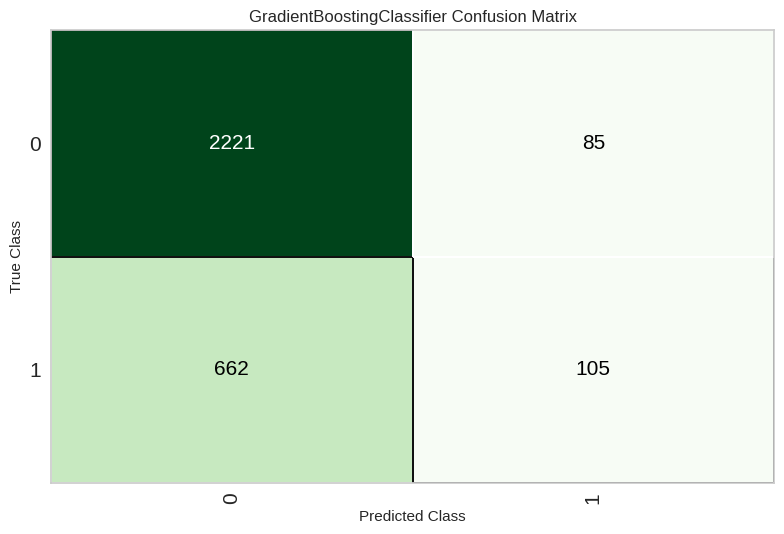

In [24]:
# plot confusion matrix
plot_model(best, plot = 'confusion_matrix')

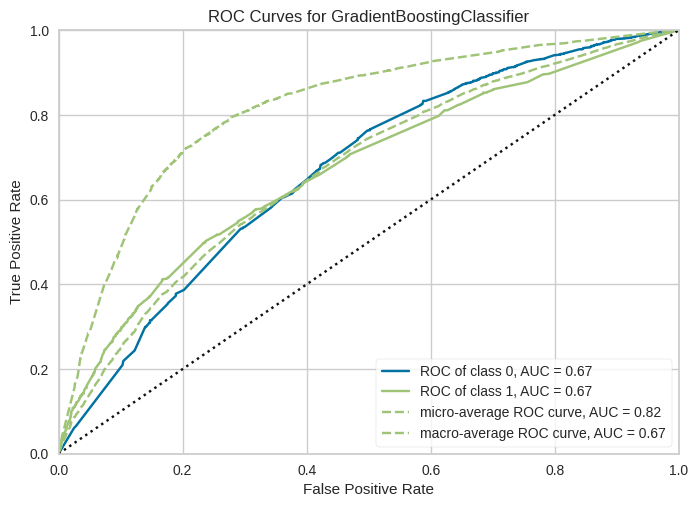

In [25]:
# plot AUC
plot_model(best, plot = 'auc')